In [207]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

print(tf.__version__)

2.15.0


In [216]:
import pandas as pd
from pathlib import Path

# Definisi fungsi image_processing
def image_processing(filepaths):
    """ Create a DataFrame with the filepath and the labels of the pictures """
    labels = [Path(filepath).parent.name for filepath in filepaths]  # Ambil nama folder induk sebagai label
    filepath_series = pd.Series(filepaths, name='Filepath').astype(str)
    labels_series = pd.Series(labels, name='Label')
    
    # Concatenate filepaths and labels
    df = pd.concat([filepath_series, labels_series], axis=1)
    
    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df

# Path direktori untuk train, test, dan validation
train_dir = Path('dataset makanan/train/')
test_dir = Path('dataset makanan/test/')
val_dir = Path('dataset makanan/validation/')

# List filepaths untuk setiap direktori
train_filepaths = list(train_dir.glob('**/*.jpg'))
test_filepaths = list(test_dir.glob('**/*.jpg'))
val_filepaths = list(val_dir.glob('**/*.jpg'))

# Convert filepaths to DataFrame menggunakan image_processing
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

# Print hasil seperti yang diminta
print('-- Training set --')
print(f'Number of pictures: {train_df.shape[0]}')
print(f'Number of different labels: {len(train_df["Label"].unique())}')
print(f'Labels: {train_df["Label"].unique()}')
print(train_df.head())

print('\n-- Test set --')
print(f'Number of pictures: {test_df.shape[0]}')
print(f'Number of different labels: {len(test_df["Label"].unique())}')
print(f'Labels: {test_df["Label"].unique()}')
print(test_df.head())

print('\n-- Validation set --')
print(f'Number of pictures: {val_df.shape[0]}')
print(f'Number of different labels: {len(val_df["Label"].unique())}')
print(f'Labels: {val_df["Label"].unique()}')
print(val_df.head())


-- Training set --
Number of pictures: 2855
Number of different labels: 36
Labels: ['capsicum' 'corn' 'lettuce' 'grapes' 'cabbage' 'raddish' 'apple' 'onion'
 'turnip' 'peas' 'pineapple' 'carrot' 'cucumber' 'potato' 'orange'
 'beetroot' 'garlic' 'kiwi' 'jalepeno' 'mango' 'bell pepper' 'banana'
 'eggplant' 'pomegranate' 'pear' 'lemon' 'ginger' 'soy beans' 'spinach'
 'tomato' 'sweetpotato' 'paprika' 'cauliflower' 'sweetcorn'
 'chilli pepper' 'watermelon']
                                      Filepath     Label
0  dataset makanan\train\capsicum\Image_99.jpg  capsicum
1      dataset makanan\train\corn\Image_25.jpg      corn
2   dataset makanan\train\lettuce\Image_36.JPG   lettuce
3    dataset makanan\train\grapes\Image_83.JPG    grapes
4   dataset makanan\train\cabbage\Image_23.jpg   cabbage

-- Test set --
Number of pictures: 340
Number of different labels: 36
Labels: ['sweetcorn' 'pineapple' 'corn' 'kiwi' 'capsicum' 'banana' 'orange'
 'apple' 'lettuce' 'eggplant' 'soy beans' 'ginger' 'pe

In [219]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['capsicum' 'corn' 'lettuce' 'grapes' 'cabbage' 'raddish' 'apple' 'onion'
 'turnip' 'peas' 'pineapple' 'carrot' 'cucumber' 'potato' 'orange'
 'beetroot' 'garlic' 'kiwi' 'jalepeno' 'mango' 'bell pepper' 'banana'
 'eggplant' 'pomegranate' 'pear' 'lemon' 'ginger' 'soy beans' 'spinach'
 'tomato' 'sweetpotato' 'paprika' 'cauliflower' 'sweetcorn'
 'chilli pepper' 'watermelon']


In [220]:
train_df.head(5)

,Filepath,Label
0,dataset makanan\train\capsicum\Image_99.jpg,capsicum
1,dataset makanan\train\corn\Image_25.jpg,corn
2,dataset makanan\train\lettuce\Image_36.JPG,lettuce
3,dataset makanan\train\grapes\Image_83.JPG,grapes
4,dataset makanan\train\cabbage\Image_23.jpg,cabbage


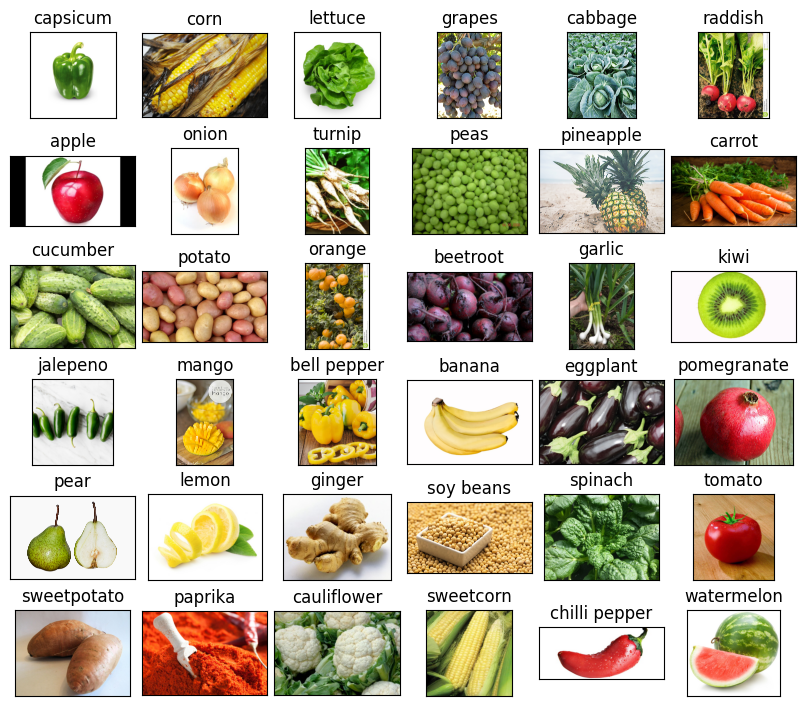

In [222]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [223]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [224]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2855 validated image filenames belonging to 36 classes.


In [225]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [226]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [227]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [228]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)


Epoch 1/5


90/90 [==============================] - 75s 806ms/step - loss: 1.7685 - accuracy: 0.5278 - val_loss: 0.4634 - val_accuracy: 0.8618
Epoch 2/5
90/90 [==============================] - 55s 610ms/step - loss: 0.5692 - accuracy: 0.8098 - val_loss: 0.2988 - val_accuracy: 0.9147
Epoch 3/5
90/90 [==============================] - 55s 612ms/step - loss: 0.3506 - accuracy: 0.8879 - val_loss: 0.2294 - val_accuracy: 0.9353
Epoch 4/5
90/90 [==============================] - 55s 615ms/step - loss: 0.2178 - accuracy: 0.9306 - val_loss: 0.1921 - val_accuracy: 0.9529
Epoch 5/5
90/90 [==============================] - 56s 625ms/step - loss: 0.1396 - accuracy: 0.9562 - val_loss: 0.1708 - val_accuracy: 0.9500


In [229]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 [==============================] - 10s 893ms/step


['sweetcorn',
 'pineapple',
 'corn',
 'kiwi',
 'capsicum',
 'banana',
 'orange',
 'apple',
 'orange',
 'lettuce',
 'eggplant',
 'soy beans',
 'ginger',
 'pear',
 'onion',
 'potato',
 'onion',
 'cucumber',
 'pomegranate',
 'pomegranate',
 'lemon',
 'tomato',
 'soy beans',
 'sweetpotato',
 'grapes',
 'cauliflower',
 'cabbage',
 'raddish',
 'pear',
 'cucumber',
 'mango',
 'cucumber',
 'chilli pepper',
 'sweetcorn',
 'paprika',
 'jalepeno',
 'banana',
 'soy beans',
 'tomato',
 'grapes',
 'chilli pepper',
 'cabbage',
 'lemon',
 'apple',
 'peas',
 'cabbage',
 'pomegranate',
 'mango',
 'capsicum',
 'carrot',
 'capsicum',
 'capsicum',
 'eggplant',
 'peas',
 'jalepeno',
 'pomegranate',
 'ginger',
 'jalepeno',
 'pear',
 'bell pepper',
 'watermelon',
 'ginger',
 'pomegranate',
 'watermelon',
 'lemon',
 'mango',
 'orange',
 'lemon',
 'soy beans',
 'paprika',
 'pomegranate',
 'cabbage',
 'eggplant',
 'capsicum',
 'raddish',
 'garlic',
 'pear',
 'pineapple',
 'ginger',
 'tomato',
 'pineapple',
 'app

In [230]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [232]:
img = output('dataset makanan/test/sweetcorn/Image_5.jpg')
img

1/1 [==============================] - 0s 62ms/step


'sweetcorn'

In [233]:
model.save('CalorieFood.h5')

C:\Users\Yosep Krispinus\python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
